## Overview

In the realm of machine learning, understanding the concept of differentiation is fundamental. Differentiation plays a pivotal role in optimization algorithms, where the goal is to minimize a loss function to improve the performance of a model. In this Jupyter Notebook, we delve into two essential techniques for differentiation: numerical differentiation and automatic differentiation.

Both the algorithms have been implemented without using any external libraries apart from numpy, which allows us to see the working of these methods in a line by line fashion.

Made by: [Harsh Lahoti](https://github.com/HLahoti)

## Setup

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from typing import List

## Numerical differenciation

Numerical differenciation borrows from the defination of derivatives as a limit.
$$ \frac{df(x)}{dx}=\lim_{h\to0} \left[\frac{f(x+h)-f(x)}{h}\right] $$
Thus numerical differenciation implements this infinitisimal change through a non zero h, which is as small as can be.
Even after the use of a very small h though, the values are never the most accurate as this is but an approximation of an infinitely small non-negative number.

In [2]:
def dfdx1(x1,x2,f,h=0.00000001):
    return (f(x1+h, x2) - f(x1-h, x2)) / (2*h)
def dfdx2(x1,x2,f,h=0.00000001):
    return (f(x1, x2+h) - f(x1, x2-h)) / (2*h)

### Examples

In [7]:
x1=5
x2=6

$$f(x_1,x_2)=\frac{x_1}{x_2}+x_1\times x_2$$

In [8]:
def f(x1,x2):
    y = (x1/x2+x1*x2)
    return y

x1=5
x2=6

In [9]:
print(f(x1,x2),dfdx1(x1,x2,f))

30.833333333333332 6.166666466356219


$$g(x_1,x_2)=f(x_1,x_2)\times e^{x_1}=\left[\frac{x_1}{x_2}+x_1\times x_2\right]\times e^{x_1}$$

In [10]:
def g(x1,x2):
    return f(x1,x2)*math.exp(x1)

In [11]:
x1=5
x2=6

In [12]:
print(g(x1,x2),dfdx1(x1,x2,g))

4576.072405662779 5491.286810865859


## Automatic differenciation

Automatic differenciation is an efficient and fast way to produce accurate derivates to functions. They break down a function into elementary operations and generate the derivates at each step propagating them through the function and finally giving the output needed.

For example:
$$f(x_1,x_2)=\frac{x_1}{x_2}+x_1\times x_2$$
$$Let,\newline v_{-1}=x_1\newline
v_{0}=x_2\newline
v_{1}=\frac{v_{-1}}{v_0}\newline
v_{2}=v_{-1}\times v_0\newline
v_3=v_1+v_2$$

### Forward

In the forward mode of AD, we compute both the value and the derivatives at the same time, in one single pass. Thus, the derivative with despect one input variable to the function with any number of outputs is computed in one pass.

This is suitable for the situations in which there are few input variables and many output variables. However, this poses some problems for when there are a large number of input variables that we typically see in modern Machine Learning, since this would require a huge number of passes.

From our previous example:
$$f(x_1,x_2)=\frac{x_1}{x_2}+x_1\times x_2$$
$$Let,\newline v_{-1}=x_1\rightarrow\dot{v}_{-1}=1\newline\downarrow\newline
v_{0}=x_2\rightarrow\dot{v}_{0}=0\newline\downarrow\newline
v_{1}=\frac{v_{-1}}{v_0}\rightarrow\dot{v}_{1}=
\frac{\dot{v}_{-1} v_0 -  v_{-1} \dot{v}_0}{v_0^2}
\newline\downarrow\newline
v_{2}=v_{-1} v_0\rightarrow\dot{v}_2=\dot{v}_{-1} v_0 + v_{-1} \dot{v}_0
\newline\downarrow\newline
v_3=v_1+v_2\rightarrow
\dot{v}_3=\dot{v}_1+ \dot{v}_2
$$

In [14]:
class ForwardVariable:
    def __init__(self,value,deriv=0):
        self.value=value
        self.deriv=deriv
    def __call__(self):
        return self.value,self.deriv
    
    def __plus__(self,other):
        if isinstance(other,ForwardVariable):
            result = ForwardVariable(self.value+other.value)
            result.deriv = self.deriv+other.deriv
            return result
        else:
            raise ValueError(f"Cannot add {type(other)} to a variable")
    def __minus__(self,other):
        if isinstance(other,ForwardVariable):
            result = ForwardVariable(self.value-other.value)
            result.deriv = self.deriv-other.deriv
            return result
        else:
            raise ValueError(f"Cannot add {type(other)} to a variable")
    def __times__(self,other):
        if isinstance(other,ForwardVariable):
            result = ForwardVariable(self.value*other.value)
            result.deriv = self.deriv*other.value + other.deriv*self.value
            return result
        else:
            raise ValueError(f"Cannot add {type(other)} to a variable")
    def __over__(self,other):
        if isinstance(other,ForwardVariable):
            result = ForwardVariable(self.value/other.value)
            result.deriv = (self.deriv*other.value - other.deriv*self.value)/other.value**2
            return result
        else:
            raise ValueError(f"Cannot add {type(other)} to a variable")
    def __exp__(self):
        result = ForwardVariable(math.exp(self.value))
        result.deriv = self.deriv*result.value
        return result
    def __root__(self):
        result = ForwardVariable(math(abs(self.value)))
        result.deriv = 0.5 * self.deriv / result.value
        return result

#### Examples

In [ ]:
x1=5
x2=6

$$f(x_1,x_2)=\frac{x_1}{x_2}+x_1\times x_2$$

In [15]:
v_1=ForwardVariable(x1,1)
v0 =ForwardVariable(x2,0)
v1=v_1.__times__(v0)
v2=v_1.__over__(v0)
v3=v1.__plus__(v2)

In [16]:
v3()

(30.833333333333332, 6.166666666666667)

$$g(x_1,x_2)=f(x_1,x_2)\times e^{x_1}=\left[\frac{x_1}{x_2}+x_1\times x_2\right]\times e^{x_1}$$

In [17]:
v_1=ForwardVariable(x1,1)
v0 =ForwardVariable(x2,0)
v1 =v_1.__times__(v0)
v2 =v_1.__over__(v0)
v3 =v_1.__exp__()
v4 =v1.__plus__(v2)
v5 =v4.__times__(v3)

In [18]:
v5()

(4576.072405662779, 5491.286886795335)

#### Applications

In [19]:
class ForwardVariable:
    def __init__(self,value,deriv=0):
        self.value=np.float64(value)
        self.deriv=np.float64(deriv)
    def __call__(self):
        return self.value,self.deriv
    
    def __add__(self,other):
        if isinstance(other,ForwardVariable):
            result = ForwardVariable(self.value+other.value)
            result.deriv = self.deriv+other.deriv
            return result
        else:
            raise ValueError(f"Cannot add {type(other)} to a variable")
    def __sub__(self,other):
        if isinstance(other,ForwardVariable):
            result = ForwardVariable(self.value-other.value)
            result.deriv = self.deriv-other.deriv
            return result
        else:
            raise ValueError(f"Cannot add {type(other)} to a variable")
    def __mul__(self,other):
        if isinstance(other,ForwardVariable):
            result = ForwardVariable(self.value*other.value)
            result.deriv = self.deriv*other.value + other.deriv*self.value
            return result
        else:
            raise ValueError(f"Cannot add {type(other)} to a variable")
    def __truediv__(self,other):
        if isinstance(other,ForwardVariable):
            result = ForwardVariable(self.value/other.value)
            result.deriv = (self.deriv*other.value - other.deriv*self.value)/other.value**2
            return result
        else:
            raise ValueError(f"Cannot add {type(other)} to a variable")
    def __abs__(self):
        result = ForwardVariable(self.value if self.value>=0 else -self.value)
        result.deriv = np.sign(self.value)*self.deriv
        return result
    def __pow__(self,other):
        if isinstance(other,ForwardVariable):
            result = ForwardVariable(self.value**other.value)
            if(self.value==0):
                result.deriv=0
            else:
                result.deriv = self.deriv*other.value*(self.value**(other.value-1))
                result.deriv += other.deriv*np.log(self.value)*result.value
            return result
        else:
            raise ValueError(f"Cannot add {type(other)} to a variable")
    def __sqrt__(self):
        result = ForwardVariable(np.sqrt(abs(self.value)))
        if(result.value==0):
            result.deriv=0
        else:
            result.deriv = 0.5 * self.deriv / result.value
        return result

##### Function

In [20]:
def f(x):
    a = x*x
    b = a*x
    return a+b

In [21]:
xn = np.linspace(0, 5, num=50)
yn = []

for i in xn:
    yn.append(f(ForwardVariable(i,1))())

yn = np.array(yn)

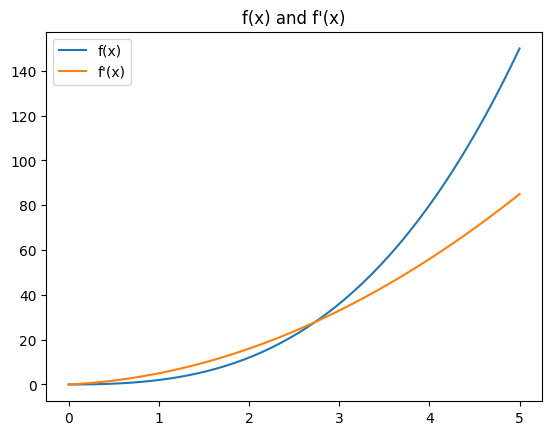

In [22]:
plt.plot(xn,yn[:,0],label="f(x)")
plt.plot(xn,yn[:,1],label="f'(x)")
plt.legend()
plt.title("f(x) and f'(x)")
plt.show()

##### Line

In [23]:
def line(w,x,b):
    return w*x+b

def simple_loss(y_true, y_pred):
    return y_true-y_pred

In [24]:
xn = np.linspace(0, 5, num=50)
W = 1
B = 1.5
yn = W*xn+B
w = 0.5
b = 2
ypred = []
learning_rate = 0.01

In [25]:
abs(W-w),abs(B-b)

(0.5, 0.5)

In [26]:
def norm_total_gradient(xn,yn,w,b,f,loss):
    gw = 0
    gb = 0
    passive_w = ForwardVariable(w,0)
    passive_b = ForwardVariable(b,0)
    for i in range(len(xn)):
        y = ForwardVariable(yn[i],0)
        x = ForwardVariable(xn[i],0)
        gw+=loss(y,f(ForwardVariable(w,1),x,passive_b))()[1]
        gb+=loss(y,f(passive_w,x,ForwardVariable(b,1)))()[1]
    gw/=len(xn)
    gb/=len(xn)
    return gw,gb

In [27]:
grads = norm_total_gradient(xn,yn,w,b,line,simple_loss)
w-=learning_rate*grads[0]
b-=learning_rate*grads[1]

In [28]:
abs(W-w),abs(B-b)

(0.475, 0.5099999999999998)

In [29]:
W = 1
B = 1.5
learning_rate = 0.01
EPOCHS = 10

xn = np.linspace(0, 5, num=50)
yn = W*xn+B
w = 0.5
b = 2

In [30]:
def compare_line(xn,yn,w,b):
    plt.plot(xn,yn,label="True line")
    plt.plot(xn,xn*w+b,label="Predicted")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

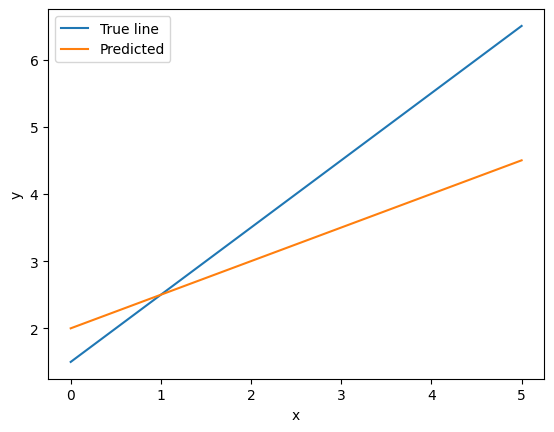

In [31]:
compare_line(xn,yn,w,b)

In [32]:
losses = []

for epoch in range(EPOCHS):
    grads = norm_total_gradient(xn,yn,w,b,line,simple_loss)
    w-=learning_rate*grads[0]
    b-=learning_rate*grads[1]
    loss = yn-w*xn-b
    losses.append(np.sum(loss)/len(xn))

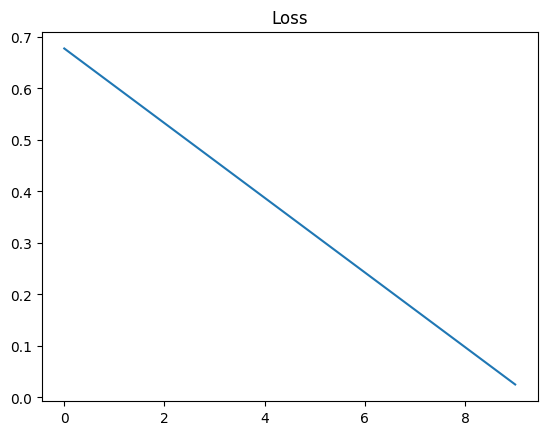

In [33]:
plt.plot(np.arange(EPOCHS),losses)
plt.title("Loss")
plt.show()

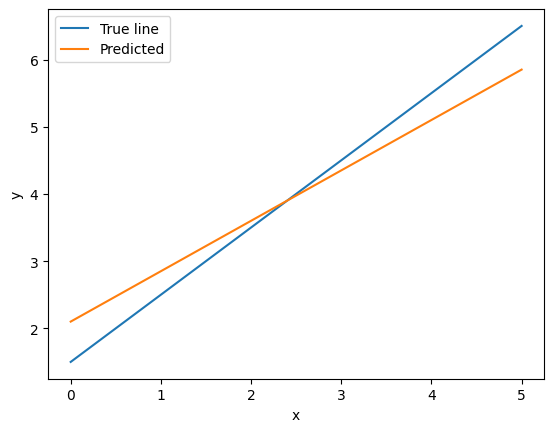

In [34]:
compare_line(xn,yn,w,b)

##### Quadratic

In [35]:
def f(x,w):
    return w[0]*x**2+w[1]*x+w[2]

def quad(x,w):
    return w[0]*x**ForwardVariable(2,0)+w[1]*x+w[2]

def lossfn(y_true,y_pred):
    return abs(y_true-y_pred)
    # square = y_true-y_pred
    # return square.__sqrt__()

In [36]:
def forward_pass(xn,yn,params,func,loss):
    gradients = np.zeros(len(params))
    passive_params = []
    active_params = []
    current_params = []
    y_true = []
    x_true = []
    for i in range(len(params)):
        passive_params.append(ForwardVariable(params[i]))
        active_params.append(ForwardVariable(params[i],1))
    current_params = passive_params.copy()
    for i in range(len(yn)):
        y_true.append(ForwardVariable(yn[i]))
        x_true.append(ForwardVariable(xn[i]))
    for i in range(len(xn)):
        for j in range(len(params)):
            if j:
                current_params[j-1]=passive_params[j-1]
            current_params[j]=active_params[j]
            gradients[j]+=lossfn(
                y_true[i],
                func(x_true[i],current_params)
                )()[1]
        current_params[len(params)-1]=passive_params[len(params)-1]
    return gradients/len(xn)

In [37]:
W = np.random.randint(low=1,high=5,size=(3)).astype(np.float64)

learning_rate = 0.01
EPOCHS = 100
N = 100

xn = np.linspace(0, 5, num=N)
yn = f(xn,W) + np.random.normal(-3,3,N) #noisy data
params = np.random.randint(low=7,high=9,size=(3)).astype(np.float64)

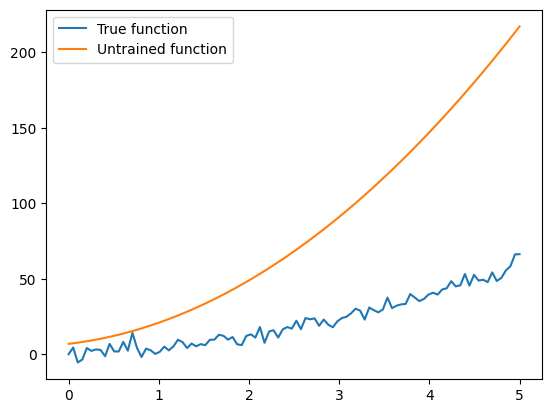

In [38]:
plt.plot(xn,yn,label="True function")
plt.plot(xn,f(xn,params),label="Untrained function")
plt.legend()
plt.show()

Epoch 10, Loss: 53.40381237823956
Epoch 20, Loss: 45.67252207806252
Epoch 30, Loss: 37.960504437826465
Epoch 40, Loss: 30.248486797590388
Epoch 50, Loss: 22.5364691573543
Epoch 60, Loss: 14.824451517118204
Epoch 70, Loss: 7.515347926883208
Epoch 80, Loss: 5.7406624453291375
Epoch 90, Loss: 5.669217103399506
Epoch 100, Loss: 5.604025454950377


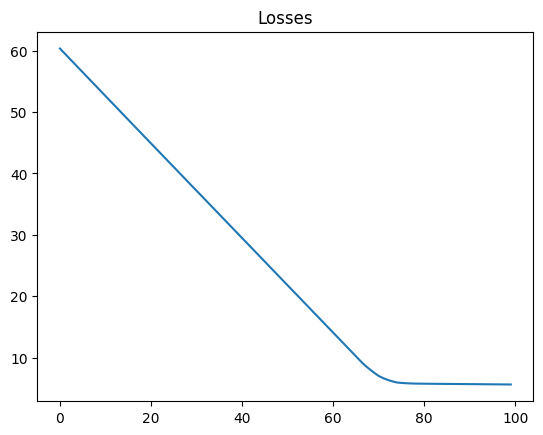

In [39]:
losses = []

for epoch in range(EPOCHS):
    delta = forward_pass(xn,yn,params,quad,lossfn)
    params -= learning_rate*delta
    loss_pred = np.sum(abs(yn-f(xn,params)))/len(xn)
    losses.append(loss_pred)
    if((epoch+1)%10==0):
        print(f"Epoch {epoch+1}, Loss: {loss_pred}")

plt.plot(np.arange(EPOCHS),losses)
plt.title("Losses")
plt.show()

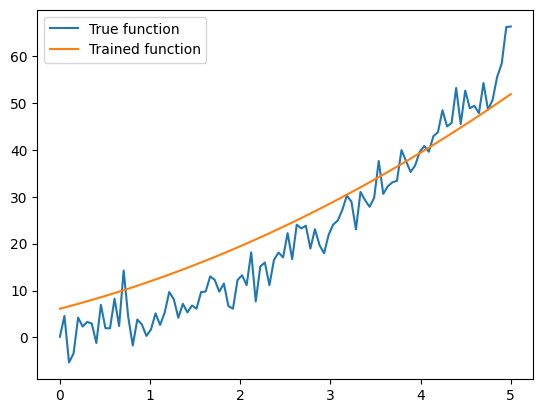

In [40]:
plt.plot(xn,yn,label="True function")
plt.plot(xn,f(xn,params),label="Trained function")
plt.legend()
plt.show()

### Backwards

In the backwards mode of AD, we have two passes, one forward and one backwards.
The forward pass is used to establish relationships among the intermediate variables and the operations on them.
After the forward pass is done, the backwards pass is done, which begins to generate the derivative for the parents of the intermediate variable at each step, eventually reaching the inputs. This approach makes use of adjoints which add up for a particular variable to give the derivative w.r.t that particular variable.

The advantages of backwards mode AD is that you require a single pass to get the derivative of the function w.r.t all the inputs, thus saving on the number of iterations when the number of output variables are small. This is the approach most commonly employed in deep learning frameworks like PyTorch and Tensorflow.

From our previous example:
$$f(x_1,x_2)=\frac{x_1}{x_2}+x_1\times x_2$$
$$Let, \bar{v}=\frac{\partial f}{\partial v}\newline v_{-1}=x_1
\newline
v_{0}=x_2
\newline
v_{1}=\frac{v_{-1}}{v_0}
\newline
v_{2}=v_{-1} v_0
\newline
v_3=v_1+v_2
\newline
\bar{v}_3 = 1
\newline
\bar{v}_1 = \bar{v}_3\frac{\partial v_3}{\partial v_1}
\newline
\bar{v}_2 = \bar{v}_3\frac{\partial v_3}{\partial v_2}
\newline
\bar{v}_{0} = \bar{v}_2\frac{\partial v_3}{\partial v_0}+\bar{v}_1\frac{\partial v_1}{\partial v_0}
\newline
\bar{v}_{-1} = \bar{v}_2\frac{\partial v_3}{\partial v_{-1}}+\bar{v}_1\frac{\partial v_1}{\partial v_{-1}}
$$

In [97]:
class BackwardVariable():
    def __init__(self,operation:str,dependencies: List[BackwardVariable],value=0):
        self.value = value
        self.deriv = 0
        self.operation=operation
        self.dependencies = dependencies 
    def __call__(self):
        return self.value

    def __add__(self,other):
        if  isinstance(other,BackwardVariable):
            return BackwardVariable( '+', [self, other],self.value+other.value)
        else:
            raise TypeError("Unsupported operand type for +: 'BackwardVariable' and " + str(type(other)))
    def __sub__(self,other):
        if  isinstance(other,BackwardVariable):
            return BackwardVariable( '-', [self, other],self.value-other.value)
        else:
            raise TypeError("Unsupported operand type for -: 'BackwardVariable' and " + str(type(other)))
    def __mul__(self,other):
        if  isinstance(other,BackwardVariable):
            return BackwardVariable('*',[self,other],self.value * other.value)
        else:
            raise TypeError("Unsupported operand type for *: 'BackwardVariable' and " + str(type(other)))
    def __truediv__(self,other):
        if  isinstance(other,BackwardVariable):
            return BackwardVariable('/',[self,other],self.value / other.value)
        else:
            raise TypeError("Unsupported operand type for /: 'BackwardVariable' and " + str(type(other)))
    def __pow__(self,other):
        if  isinstance(other,BackwardVariable):
            return BackwardVariable('**',[self,other],math.pow(self.value,other.value))
        else:
            raise TypeError("Unsupported operand type for **: 'BackwardVariable' and " + str(type(other)))
    def __abs__(self):
        return BackwardVariable('abs',[self], abs(self.value))

    def backwards(self,fcall:bool=True):
        if fcall:
            self.deriv=1
        if(self.operation==''):
            return
        elif(self.operation=='+'):
            self.dependencies[0].deriv += self.deriv*1
            self.dependencies[1].deriv += self.deriv*1
        elif(self.operation=='-'):
            self.dependencies[0].deriv += self.deriv*1
            self.dependencies[1].deriv -= self.deriv*1
        elif(self.operation=='*'):
            self.dependencies[0].deriv += self.deriv*self.dependencies[1].value
            self.dependencies[1].deriv += self.deriv*self.dependencies[0].value
        elif(self.operation=='/'):
            self.dependencies[0].deriv += self.deriv/self.dependencies[1].value
            self.dependencies[1].deriv += -self.deriv*(self.value/self.dependencies[1].value)
        # elif(self.operation=='exp'):
        #     self.dependencies[0].deriv += self.deriv*self.value
        elif(self.operation=='**'):
            self.dependencies[0].deriv += self.deriv*self.dependencies[1].value*math.pow(self.dependencies[0].value,(self.dependencies[1].value-1))
            if(self.dependencies[0].value==0):
                self.dependencies[1].deriv=0
            else:
                self.dependencies[1].deriv += self.deriv*math.log(abs(self.dependencies[0].value))*self.value
        elif(self.operation=='abs'):
            self.dependencies[0].deriv = self.deriv*np.sign(self.dependencies[0].value)
        for dependency in self.dependencies:
            dependency.backwards(fcall=False)
    def zerograd(self):
        self.deriv=0
        for dependency in self.dependencies:
            dependency.zerograd()


#### Examples

In [ ]:
x1=5
x2=6

$$f(x_1,x_2)=\frac{x_1}{x_2}+x_1\times x_2$$

In [99]:
v_1= BackwardVariable('',[],x1)
v0 = BackwardVariable('',[],x2)

In [100]:
v1 = v_1*v0
v2 = v_1/v0
v3 = v1+v2

In [101]:
v3.backwards()

In [102]:
v3(),v_1.deriv

(30.833333333333332, 6.166666666666667)

$$g(x_1,x_2)=f(x_1,x_2)\times e^{x_1}=\left[\frac{x_1}{x_2}+x_1\times x_2\right]\times e^{x_1}$$

In [104]:
v_1= BackwardVariable('',[],x1)
v0 = BackwardVariable('',[],x2)
v1 = v_1/v0
v2 = v_1*v0
v3 = v1+v2
v4 = BackwardVariable('',[],np.e)**v_1
v5 = v3*v4

In [105]:
v5.backwards()

In [106]:
v5(),v_1.deriv

(4576.072405662778, 5491.286886795333)

#### Applications

##### Function

In [109]:
def f(x):
    a = x*x
    b = a*x
    return a+b

In [110]:
xn = np.linspace(0, 5, num=50)
yn = []

for i in xn:
    var = BackwardVariable('',[],i)
    res = f(var)
    res.backwards()
    yn.append((res(),var.deriv))

yn = np.array(yn)

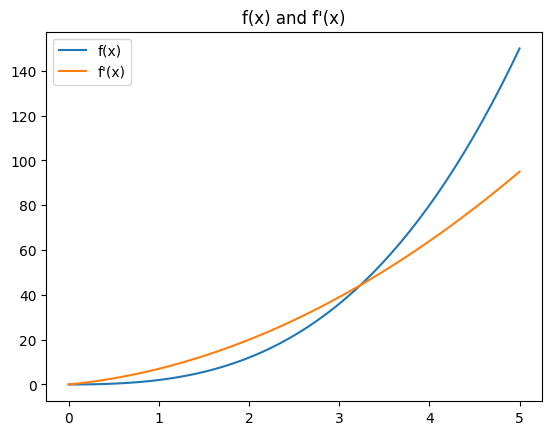

In [111]:
plt.plot(xn,yn[:,0],label="f(x)")
plt.plot(xn,yn[:,1],label="f'(x)")
plt.legend()
plt.title("f(x) and f'(x)")
plt.show()

##### Line

In [112]:
def line(w,x,b):
    return w*x+b

def simple_loss(y_true, y_pred):
    return y_true-y_pred

In [115]:
xn = np.linspace(0, 5, num=50)
W = 1
B = 1.5
yn = W*xn+B
w = 0.5
b = 2
ypred = []
learning_rate = 0.01

In [116]:
abs(W-w),abs(B-b)

(0.5, 0.5)

In [119]:
def single_pass(xn,yn,w,b,f,loss):
    x = BackwardVariable('',[],xn[0])
    y = BackwardVariable('',[],yn[0])
    w = BackwardVariable('',[],w)
    b = BackwardVariable('',[],b)
    for i in range(len(xn)):
        x.value=xn[i]
        y.value=yn[i]
        val = f(w,x,b)
        lval = loss(y,val)
        lval.backwards()
    return w.deriv/len(xn),b.deriv/len(xn)

In [120]:
grads = single_pass(xn,yn,w,b,line,simple_loss)
w-=learning_rate*grads[0]
b-=learning_rate*grads[1]

In [121]:
abs(W-w),abs(B-b)

(0.475, 0.5099999999999998)

In [122]:
W = 1
B = 1.5
learning_rate = 0.01
EPOCHS = 10

xn = np.linspace(0, 5, num=50)
yn = W*xn+B
w = 0.5
b = 2

In [123]:
def compare_line(xn,yn,w,b):
    plt.plot(xn,yn,label="True line")
    plt.plot(xn,xn*w+b,label="Predicted")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

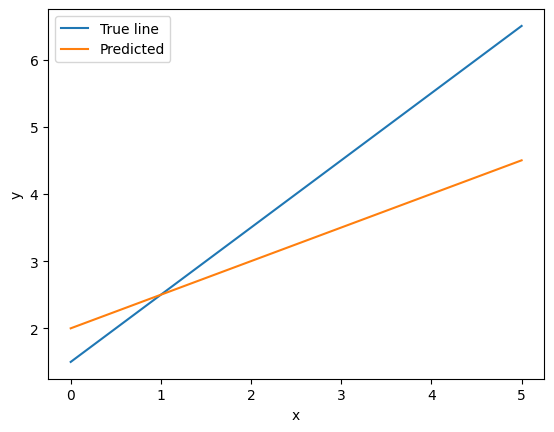

In [124]:
compare_line(xn,yn,w,b)

In [125]:
losses = []

for epoch in range(EPOCHS):
    grads = single_pass(xn,yn,w,b,line,simple_loss)
    w-=learning_rate*grads[0]
    b-=learning_rate*grads[1]
    loss = yn-w*xn-b
    losses.append(np.sum(loss)/len(xn))

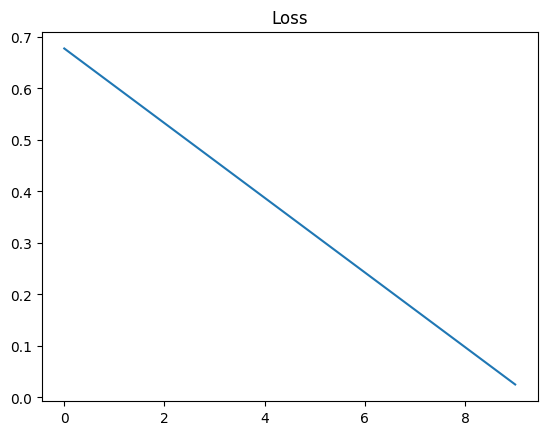

In [126]:
plt.plot(np.arange(EPOCHS),losses)
plt.title("Loss")
plt.show()

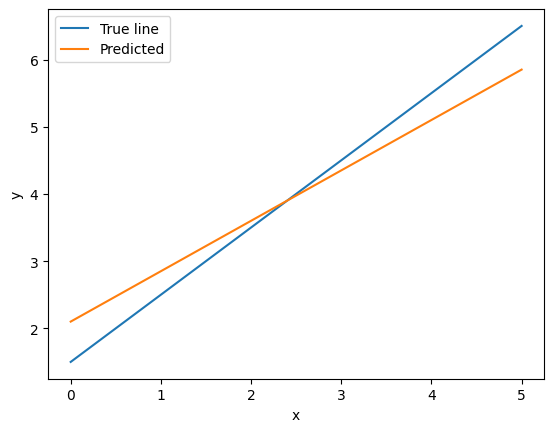

In [127]:
compare_line(xn,yn,w,b)

##### Quadratic

In [162]:
def f(x,w):
    return w[0]*x**2+w[1]*x+w[2]

def quad(x,w):
    return w[0]*x**BackwardVariable('',[],2)+w[1]*x+w[2]

def lossfn(y_true,y_pred):
    return abs(y_true-y_pred)
    # square = y_true-y_pred
    # return square.__sqrt__()

In [163]:
def single_pass(xn,yn,params,func,loss):
    x = BackwardVariable('',[],xn[0])
    y = BackwardVariable('',[],yn[0])
    pvars = [BackwardVariable('',[],i) for i in params]
    for i in range(len(xn)):
        val = func(x,pvars)
        lval = loss(y,val)
        lval.backwards()
    gradients = []
    for v in pvars:
        gradients.append(v.deriv/len(xn))
    return np.array(gradients)

In [164]:
W = np.random.randint(low=1,high=5,size=(3)).astype(np.float64)

learning_rate = 0.01
EPOCHS = 100
N = 100

xn = np.linspace(0, 5, num=N)
yn = f(xn,W) + np.random.normal(-3,3,N) #noisy data
params = np.random.randint(low=7,high=9,size=(3)).astype(np.float64)

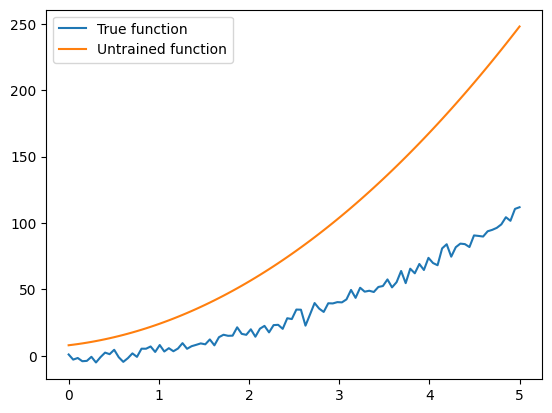

In [165]:
plt.plot(xn,yn,label="True function")
plt.plot(xn,f(xn,params),label="Untrained function")
plt.legend()
plt.show()

Epoch 10, Loss: 54.15590444299282
Epoch 20, Loss: 54.055904442992826
Epoch 30, Loss: 53.955904442992804
Epoch 40, Loss: 53.855904442992816
Epoch 50, Loss: 53.75590444299282
Epoch 60, Loss: 53.65590444299282
Epoch 70, Loss: 53.555904442992826
Epoch 80, Loss: 53.455904442992825
Epoch 90, Loss: 53.35590444299282
Epoch 100, Loss: 53.25590444299284


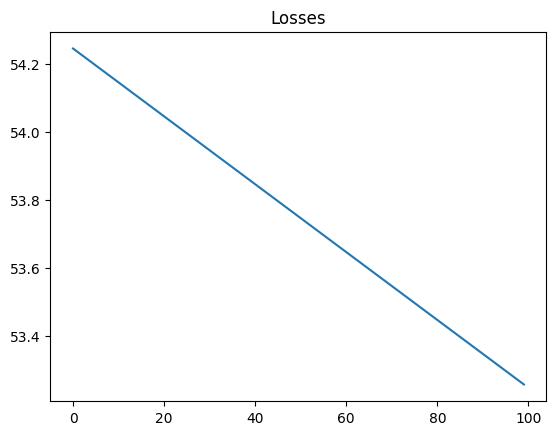

In [171]:
losses = []

for epoch in range(EPOCHS):
    delta = single_pass(xn,yn,params,quad,lossfn)
    params -= learning_rate*delta
    loss_pred = np.sum(abs(yn-f(xn,params)))/len(xn)
    losses.append(loss_pred)
    if((epoch+1)%10==0):
        print(f"Epoch {epoch+1}, Loss: {loss_pred}")

plt.plot(np.arange(EPOCHS),losses)
plt.title("Losses")
plt.show()

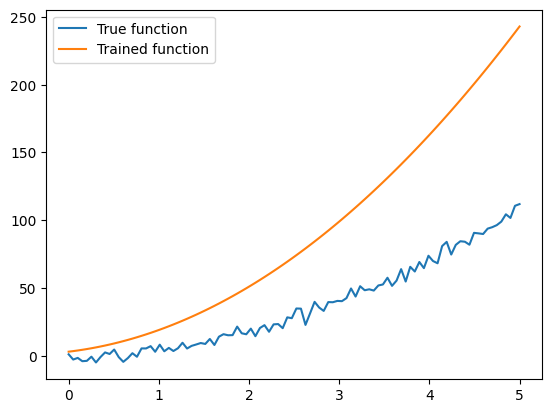

In [172]:
plt.plot(xn,yn,label="True function")
plt.plot(xn,f(xn,params),label="Trained function")
plt.legend()
plt.show()